# Representing geodata in vector format

## `shapely`

- `shapely` is used for geometric objects like `Point`, `LineString`, etc.
- basedon `GEOS` C++ library
- used by, eg. `geopandas`

# Create Point Geometries

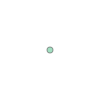

In [4]:
from shapely import Point

point = Point(2.2, 4.2)
point3D = Point(9.26, -2.456, 0.57)
point

## String representations

In [5]:
print(point3D)

POINT Z (9.26 -2.456 0.57)


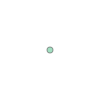

In [6]:
point3D

__WKT charachter string__

In [8]:
point.wkt

'POINT (2.2 4.2)'

## Accessing Coordinates

In [11]:
point.coords

In [12]:
list(point.coords)

[(2.2, 4.2)]

In [13]:
point.x, point.y

(2.2, 4.2)

In [15]:
point.geom_type

'Point'

In [17]:
point3D.z

0.57

# Create LineStrings

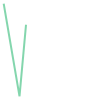

In [21]:
from shapely import LineString

point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

line = LineString([point1, point2, point3])
line

In [22]:
line.wkt

'LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)'

In [24]:
line.reverse().wkt

'LINESTRING (9.26 -2.456, 7.2 -25.1, 2.2 4.2)'

In [25]:
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [27]:
line.xy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [29]:
line.xy[0]

array('d', [2.2, 7.2, 9.26])

In [32]:
print(list(line.xy[0]))

[2.2, 7.2, 9.26]


In [37]:
print(f"{line.length=:.2f}")

line.length=52.46


In [38]:
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


# Create Polygon Geometries

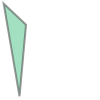

In [39]:
from shapely import Polygon

poly = Polygon([point1, point2, point3])
poly

Coordinates have parentheses because they may have "holes". The one here is the `exterior` of the polygon.

In [42]:
poly.wkt

'POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))'

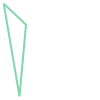

In [43]:
poly.exterior

## Polygon with holes

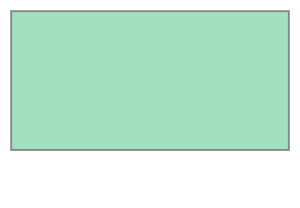

In [44]:
exterior = [(-180,90), (-180, -90), (180, -90), (180, 90)]
holes_coordinates = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

poly_without_hole = Polygon(shell=exterior)
poly_without_hole

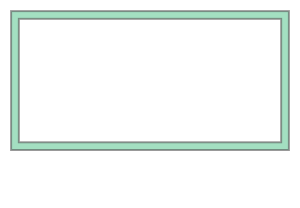

In [45]:
poly_with_hole = Polygon(shell=exterior, holes=holes_coordinates)
poly_with_hole

In [46]:
poly_with_hole.wkt

'POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))'

In [47]:
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ", poly.area)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)

Polygon centroid:  POINT (6.22 -7.785333333333334)
Polygon Area:  86.789
Polygon Bounding Box:  (2.2, -25.1, 9.26, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2)
Polygon Exterior Length:  62.16395199996553


Lengths and areas are based on lon/lat coordinate system for input. They can be converted to eg., meters.

Mininum and maximum bounding boxes. Useful to select geometries with only two coordinates.

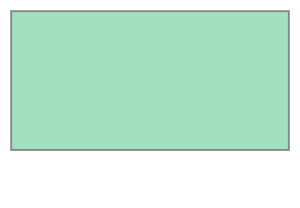

In [52]:
from shapely.geometry import box

min_x, min_y = -180, -90
max_x, max_y = 180, 90 
box_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
box_poly

In [53]:
box_poly.wkt

'POLYGON ((180 -90, 180 90, -180 90, -180 -90, 180 -90))'

# Multipoint, MultiLineString, MultiPolygon

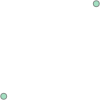

In [54]:
from shapely import MultiLineString, MultiPoint, MultiPolygon

multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
multipoint

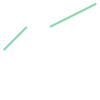

In [56]:
multiline = MultiLineString(
    [LineString([(2, 2), (3, 3)]), LineString([(4, 3), (6, 4)])]
)
multiline

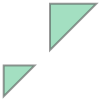

In [57]:
multipoly = MultiPolygon(
    [Polygon([(0, 0), (0, 4), (4, 4)]), Polygon([(6, 6), (6, 12), (12, 12)])]
)
multipoly

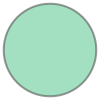

In [58]:
point = Point((0, 0))
point.buffer(1)

In [2]:
import geopandas as gpd
data = gpd.read_file("data/wa_crs.gpkg")
data.head()

,FIPS,TOT_POP,area_km2,density,geometry
0,53061053700,2821,3807.184608,0.740967,"MULTIPOLYGON (((-13483919.86 6105180.541, -134..."
1,53061053400,4757,293.698506,16.196882,"MULTIPOLYGON (((-13595221.874 6140803.227, -13..."
2,53061053506,4987,583.962356,8.539934,"MULTIPOLYGON (((-13564549.124 6129594.689, -13..."
3,53061053302,4753,201.313089,23.609990,"MULTIPOLYGON (((-13609009.572 6156490.378, -13..."
4,53061053301,4542,56.753758,80.029943,"MULTIPOLYGON (((-13625918.78 6148350.23, -1362..."
